### CSWin

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
# from PIL.Image import Image
# import cv2
from tqdm import tqdm

from cswin.cswin_transformer import CSWinTransformer

In [30]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root="./dataset",
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root="./dataset",
    train=False,
    download=True,
    transform=transform
)

batch_size=128

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader  = DataLoader(testset,  batch_size=batch_size, shuffle=False)

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Quick experiment by training a classifier on CIFAR10

In [123]:
model = CSWinTransformer(
    img_size=32,
    num_classes=10,
    embed_dim=12, 
    depth=[1, 2, 2, 1], 
    num_heads=[2, 2, 2, 2],
    split_size=[1, 2, 2], 
    mlp_ratio=2. # num params in each MLP relative to embed dim
)
print(f"Model params: {sum(p.numel() for p in model.parameters())/1e6:.2f}M")

Model params: 0.18M


Epoch 20/20: 100%|███████████████████████████████████████████████| 391/391 [03:43<00:00,  1.75it/s, loss=1.27]


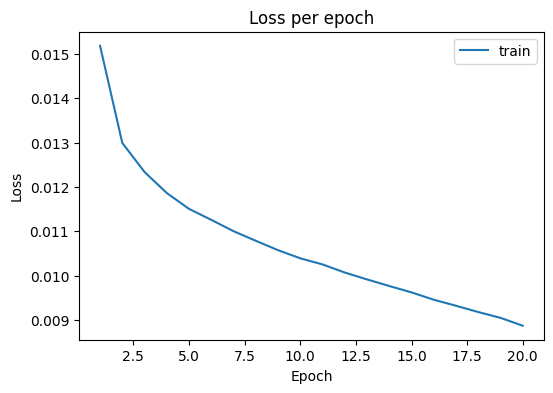

In [124]:
n_epochs = 20

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

train_losses = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    loop = tqdm(trainloader, desc=f"Epoch {epoch+1}/{n_epochs}")
    
    for images, labels in loop:
        # images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    train_loss = running_loss / len(trainloader.dataset)
    train_losses.append(train_loss)

    # scheduler.step()

    # Evaluate after each epoch
    # acc = evaluate(model, testloader, device)

plt.figure(figsize=(6, 4))
plt.title("Loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1, n_epochs+1), train_losses, color="tab:blue", label="train")
# plt.plot(range(1, n_epochs+1), val_losses, color="tab:orange", label="val")
plt.legend();

In [126]:
for j, data in enumerate(test_loader):
    inputs, labels = data
    preds = model(inputs).detach() 
    break

# 10 classes, so accuracy of randomly picking a class is 10% 
(labels == preds.argmax(axis=1)).numpy().mean()

np.float64(0.53125)